# Exploring BeeWalk data with Python Pandas

In this notebook I'd like to explore a small part of the _BeeWalk_ dataset using some of my recently acquired _Python Pandas_ skills.

## About the dataset

Quoting directly from the overview on the Bumblebee Conservation Trust's website:

```
BeeWalk is a standardised bumblebee-monitoring scheme which involves volunteer ‘BeeWalkers’ walking the same fixed route (transect) once a month between March and October, counting the bumblebees seen and identifying them to species and caste (queen, worker, male) where possible.
```

Read more at https://www.bumblebeeconservation.org/beewalk/ and as mentioned on the https://www.bumblebeeconservation.org/our-science-research/ page the dataset is available via https://figshare.com/articles/BeeWalk_dataset_2008-19/12280547.

## Software used

This [jupyter](https://en.wikipedia.org/wiki/Project_Jupyter) notebook uses the [pandas](https://en.wikipedia.org/wiki/Pandas_(software)) and [matplotlib](https://en.wikipedia.org/wiki/Matplotlib) python libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Reading the data file

In [2]:
dataset_url = "https://figshare.com/articles/dataset/BeeWalk_dataset_2008-19/12280547"
file = "../data-sets/BeeWalk data 2008-19 06022020 for sharing.xlsx" # manually downloaded from {dataset_url}
sheets = pd.read_excel(io=file, sheet_name=[0, 1])

From the preview on the `figshare.com` website we know that the Excel file contains two tabs with metadata and data respectively.

Let's fill`metadata` and `data` variables accordingly.

In [3]:
metadata = sheets[0].copy()
data = sheets[1].copy()

## Metadata overview

The raw metadata contains 50 rows and 4 columns.

In [4]:
metadata.shape

(50, 4)

Note how the content of third and fourth columns is tangential.

In [5]:
metadata

,Dataset header,Explanation,Unnamed: 2,Data downloaded from website on
0,RecordKey,Dataset unique key,NaN,2018-01-06
1,Website ID,Website use only - record identifier,NaN,2019-02-15
2,Website RecordKey,Website use only - website unique key,NaN,2020-01-13
3,SiteName,Transect name,NaN,NaT
4,Site section,Section of the transect,NaN,NaT
5,ViceCounty,Watsonian vice-county of the transect centre p...,NaN,NaT
6,established,Year first walked,NaN,NaT
7,GridReference,OS grid ref of the transect centre point,NaN,NaT
8,Projection,Map projection of the transect centre point (s...,NaN,NaT
9,Precision,Precision in metres of the transect centre point,NaN,NaT


Let's remove those two columns.

In [6]:
metadata.drop(['Unnamed: 2', 'Data downloaded from website on'], axis=1, inplace=True)
metadata.shape

(50, 2)

And let's use the first column as the metadata index.

In [7]:
metadata.set_index('Dataset header', inplace=True)

In [8]:
metadata.shape

(50, 1)

In [9]:
metadata

,Explanation
Dataset header,
RecordKey,Dataset unique key
Website ID,Website use only - record identifier
Website RecordKey,Website use only - website unique key
SiteName,Transect name
Site section,Section of the transect
ViceCounty,Watsonian vice-county of the transect centre p...
established,Year first walked
GridReference,OS grid ref of the transect centre point
Projection,Map projection of the transect centre point (s...


## Data overview

The raw data contains several thousand rows and 49 columns.

In [10]:
data.shape

(151233, 49)

The metadata defined 50 headers but the data contains only 49 columns.

Let's find the missing column and its meaning.

In [11]:
for header in metadata.index.values:
    if header not in data.columns:
        print(metadata.loc[header])

Explanation    Name of recorder, supplied with submitted data
Name: Recorder, dtype: object


Since the name of the recorder is not part of the public dataset, let's remove the corresponding metadata row.

In [12]:
metadata.drop(['Recorder'], axis=0, inplace=True)

In [13]:
metadata.shape

(49, 1)

## Data previews

Let's looks at the first few data rows.

In [14]:
data.head(n=5)

,RecordKey,Website ID,Website RecordKey,SiteName,Site section,ViceCounty,established,GridReference,Projection,Precision,...,StartDate,EndDate,DateType,Year,Month,Day,Sensitive,SHBP locality name,SHBP grid ref,Week
0,1,1350305,iBRC1350305,Holyrood park - Hunter's Bog,Holyrood park - Hunter's Bog - S2,Midlothian,2012.0,NT273733,OSGB,100,...,2012-10-08 00:00:00,2012-10-08 00:00:00,D,2012,10,8,F,NaN,NaN,41
1,2,1350304,iBRC1350304,Holyrood park - Hunter's Bog,Holyrood park - Hunter's Bog - S1,Midlothian,2012.0,NT273733,OSGB,100,...,2012-10-08 00:00:00,2012-10-08 00:00:00,D,2012,10,8,F,NaN,NaN,41
2,3,1350292,iBRC1350292,Holyrood park - Hunter's Bog,Holyrood park - Hunter's Bog - S3,Midlothian,2012.0,NT273733,OSGB,100,...,2012-09-27 00:00:00,2012-09-27 00:00:00,D,2012,9,27,F,NaN,NaN,39
3,4,1349168,iBRC1349168,Holyrood park - Hunter's Bog,Holyrood park - Hunter's Bog - S4,Midlothian,2012.0,NT273733,OSGB,100,...,2012-07-19 00:00:00,2012-07-19 00:00:00,D,2012,7,19,F,NaN,NaN,29
4,5,1349167,iBRC1349167,Holyrood park - Hunter's Bog,Holyrood park - Hunter's Bog - S2,Midlothian,2012.0,NT273733,OSGB,100,...,2012-07-19 00:00:00,2012-07-19 00:00:00,D,2012,7,19,F,NaN,NaN,29


Let's use the first column as the data index and let's remove the two columns with website identifiers.

In [15]:
data.set_index('RecordKey', inplace=True)
data.drop(['Website ID', 'Website RecordKey'], axis=1, inplace=True)

Let's looks at a small sample of rows.

In [16]:
data.sample(n=5, random_state=42)

,SiteName,Site section,ViceCounty,established,GridReference,Projection,Precision,Transect lat,Transect long,transect OS1936 lat,...,StartDate,EndDate,DateType,Year,Month,Day,Sensitive,SHBP locality name,SHBP grid ref,Week
RecordKey,,,,,,,,,,,,,,,,,,,,,
71525,Lancaster Canal,Lancaster Canal - S1,West Lancashire,2012.0,SD521713,OSGB,100,54.135307,-2.734619,54.135136,...,2017-06-24 00:00:00,2017-06-24 00:00:00,D,2017,6,24,F,NaN,NaN,25
38222,Sustrans - NCN77 Perth Section 3,Sustrans - NCN77 Perth Section 3 - S5,Mid Perthshire,2015.0,NO094265,OSGB,100,56.422047,-3.470346,56.422108,...,2015-07-18 00:00:00,2015-07-18 00:00:00,D,2015,7,18,F,NaN,NaN,29
7130,"Rockside and Dreemskerry Road, Isle of Man","Rockside and Dreemskerry Road, Isle of Man - S1",Isle of Man,2009.0,SC478908,OSGB,100,54.290104,-4.339882,54.289967,...,2011-07-11 00:00:00,2011-07-11 00:00:00,D,2011,7,11,F,NaN,NaN,29
124906,Hunting Hall Farm,Hunting Hall Farm - S5,NaN,2016.0,NU033408,OSGB,100,55.660751,-1.949104,55.660721,...,2019-06-21 00:00:00,2019-06-21 00:00:00,D,2019,6,21,F,NaN,NaN,25
115868,Brandhill Gutter,Brandhill Gutter - S3,Shropshire,2017.0,SO425787,OSGB,100,52.403248,-2.846628,52.402912,...,2017-06-27 00:00:00,2017-06-27 00:00:00,D,2017,6,27,F,NaN,NaN,26


## Data cleaning: established

The `established` column appears to be a floating pointer number, let's use `dtype` to confirm that.

In [17]:
data['established'].dtype

dtype('float64')

Let's double-check the meaning of `established` via the metadata.

In [18]:
metadata.loc['established', 'Explanation']

'Year first walked'

The `info` for the column shows that there are 151,233 entries but only 151,224 non-null values. This means we have some missing data.

In [19]:
data['established'].info()

<class 'pandas.core.series.Series'>
Int64Index: 151233 entries, 1 to 154280
Series name: established
Non-Null Count   Dtype  
--------------   -----  
151224 non-null  float64
dtypes: float64(1)
memory usage: 2.3 MB


Let's find the rows with missing `established` data.

In [20]:
established_missing_data = data[data['established'].isna()]
established_missing_data

,SiteName,Site section,ViceCounty,established,GridReference,Projection,Precision,Transect lat,Transect long,transect OS1936 lat,...,StartDate,EndDate,DateType,Year,Month,Day,Sensitive,SHBP locality name,SHBP grid ref,Week
RecordKey,,,,,,,,,,,,,,,,,,,,,
139745,Cranham Commom,Cranham Commom - S1,NaN,NaN,ST812461,OSGB,100,51.213734,-2.270558,51.213276,...,2019-08-18 00:00:00,2019-08-18 00:00:00,D,2019,8,18,F,NaN,NaN,34
139746,Cranham Commom,Cranham Commom - S1,NaN,NaN,ST812461,OSGB,100,51.213734,-2.270558,51.213276,...,2019-08-18 00:00:00,2019-08-18 00:00:00,D,2019,8,18,F,NaN,NaN,34
139747,Cranham Commom,Cranham Commom - S1,NaN,NaN,ST812461,OSGB,100,51.213734,-2.270558,51.213276,...,2019-08-18 00:00:00,2019-08-18 00:00:00,D,2019,8,18,F,NaN,NaN,34
139748,Cranham Commom,Cranham Commom - S1,NaN,NaN,ST812461,OSGB,100,51.213734,-2.270558,51.213276,...,2019-08-18 00:00:00,2019-08-18 00:00:00,D,2019,8,18,F,NaN,NaN,34
144320,Cranham Commom,Cranham Commom - S1,NaN,NaN,ST812461,OSGB,100,51.213734,-2.270558,51.213276,...,2019-07-21 00:00:00,2019-07-21 00:00:00,D,2019,7,21,F,NaN,NaN,30
144321,Cranham Commom,Cranham Commom - S1,NaN,NaN,ST812461,OSGB,100,51.213734,-2.270558,51.213276,...,2019-07-21 00:00:00,2019-07-21 00:00:00,D,2019,7,21,F,NaN,NaN,30
144322,Cranham Commom,Cranham Commom - S1,NaN,NaN,ST812461,OSGB,100,51.213734,-2.270558,51.213276,...,2019-07-21 00:00:00,2019-07-21 00:00:00,D,2019,7,21,F,NaN,NaN,30
144323,Cranham Commom,Cranham Commom - S1,NaN,NaN,ST812461,OSGB,100,51.213734,-2.270558,51.213276,...,2019-07-21 00:00:00,2019-07-21 00:00:00,D,2019,7,21,F,NaN,NaN,30
144324,Cranham Commom,Cranham Commom - S1,NaN,NaN,ST812461,OSGB,100,51.213734,-2.270558,51.213276,...,2019-07-21 00:00:00,2019-07-21 00:00:00,D,2019,7,21,F,NaN,NaN,30


The rows with missing `established` data are all for the same site.

In [21]:
established_missing_data['SiteName'].unique()

array(['Cranham Commom'], dtype=object)

Furthermore all rows for that site lack the `established` data.

In [22]:
mask = (data['SiteName'] == 'Cranham Commom')
data[mask]['established'].unique()

array([nan])

Let's use the earliest `Year` recorded for the site to fill the missing `established` data.

In [23]:
data[mask]['Year'].min()

2019

In [24]:
data.loc[mask, 'established'] = data[mask]['Year'].min()

Lastly, we can now convert from floating point to integer data type for the `established` year column

In [25]:
data['established'] = data['established'].astype(int)

In [26]:
data['established'].dtype

dtype('int64')

The `value_counts` function shows the number of sites established in a given year.

In [27]:
data['established'].value_counts().sort_index()

2008     1694
2009     4607
2010    15921
2011     5739
2012     9566
2013    16359
2014    22011
2015    20423
2016    20091
2017    14288
2018    12662
2019     7872
Name: established, dtype: int64

## Data preview: flower_visited

In [28]:
metadata.loc['flower_visited', 'Explanation']

'The flower species visited by the bees'

The flower species visited is recorded about half the time.

In [29]:
data['flower_visited'].notnull().value_counts()

True     75919
False    75314
Name: flower_visited, dtype: int64

The `flower_visited` values use a mix of upper and lowercase and record one or more species for each record.

In [30]:
data['flower_visited'].value_counts()

Bramble                                            3668
bramble                                            1729
Red Clover                                         1255
Knapweed                                           1221
White Comfrey                                      1128
                                                   ... 
White Clover + Meadow Buttercup                       1
Meadow Buttercup + Narrow-leaved Water dropwort       1
Meadow Butterup                                       1
Cats-ear + Meadow Buttercup                           1
Broad Bean                                            1
Name: flower_visited, Length: 9520, dtype: int64

Let's consistently use lowercase letters for the `flower_visited` column.

In [31]:
data['flower_visited'] = data['flower_visited'].str.lower()

In [32]:
data['flower_visited'].value_counts()

bramble                            5398
white clover                       2387
red clover                         2086
knapweed                           2016
white comfrey                      1445
                                   ... 
knapweed/eyebright                    1
knapweed/red clover                   1
rosebay willowherb / horse mint       1
confrey                               1
rape, white comfrey                   1
Name: flower_visited, Length: 8186, dtype: int64

The `flower_visited` values also use a mix of common and latin plant names e.g. _clover_ vs. _trifolium_.

In [33]:
clover_mask = data['flower_visited'].isin(['trifolium pratense', 'trifolium repens', 'red clover', 'white clover'])

data[clover_mask]['flower_visited'].value_counts()

white clover          2387
red clover            2086
trifolium pratense     476
trifolium repens       337
Name: flower_visited, dtype: int64

In [34]:
contains_other_clover_mask = data['flower_visited'].notnull() \
                           & data['flower_visited'].str.contains('clover') \
                           & ~clover_mask

data[contains_other_clover_mask]['flower_visited'].value_counts()

clover                                  380
redclover                                52
whiteclover                              26
alsike clover                            23
clover sp.                               20
                                       ... 
3 knapweed / 1 red clover                 1
clovers, birdsfoot trefoil, knapweed      1
red clover + meadow buttercup             1
white clover + meadow buttercup           1
marsh thistle, red clover                 1
Name: flower_visited, Length: 487, dtype: int64

## Bee counting

There are three bumblebee castes but it's not always possible to know which caste a bee belongs to.

In [35]:
castes = ['queens', 'workers', 'males', 'unknown']

for caste in castes:
    print(metadata.loc[caste, 'Explanation'])

Number of queens of the species recorded on that section and date
Number of workers of the species recorded on that section and date
Number of males of the species recorded on that section and date
Number of the species recorded on that section and date which could not be confidently allocated to caste


Here's some per-caste bee count statistics.

In [36]:
data[castes].describe()

,queens,workers,males,unknown
count,151233.000000,151233.000000,151233.000000,151233.000000
mean,0.299121,2.100778,0.298202,0.493675
std,1.175357,6.669967,1.716639,4.971128
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000
75%,0.000000,2.000000,0.000000,0.000000
max,200.000000,1000.000000,300.000000,1500.000000


Let's sum up the per-caste bee counts to obtain overall bee count statistics.

In [37]:
data['bees'] = 0
for caste in castes:
    data['bees'] += data[caste]

In [38]:
data[['bees']].describe()

,bees
count,151233.000000
mean,3.191777
std,8.503142
min,0.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,1500.000000


Let's add additional columns simplifying from _number of bees_ integer to _bees Y/N_ boolean values.

In [39]:
data['has_bees'] = (data['bees'] != 0)
for caste in castes:
    data['has_' + caste] = (data[caste] != 0)

Here's the bee count data for the _Chocolate Mining Bee_ species.

In [40]:
bee_mask = (data['species'] == 'Chocolate Mining Bee')

selected_columns = [
    'bees', 'queens', 'workers', 'males', 'unknown',
    'has_bees', 'has_queens', 'has_workers', 'has_males', 'has_unknown',
    'species'
]

data[bee_mask][selected_columns]

,bees,queens,workers,males,unknown,has_bees,has_queens,has_workers,has_males,has_unknown,species
RecordKey,,,,,,,,,,,
89926,1500,0,0,0,1500,True,False,False,False,True,Chocolate Mining Bee
125808,1,1,0,0,0,True,True,False,False,False,Chocolate Mining Bee
125820,1,1,0,0,0,True,True,False,False,False,Chocolate Mining Bee
126405,1,0,0,0,1,True,False,False,False,True,Chocolate Mining Bee
127864,5,0,0,0,5,True,False,False,False,True,Chocolate Mining Bee
128761,1,0,1,0,0,True,False,True,False,False,Chocolate Mining Bee
128996,1,1,0,0,0,True,True,False,False,False,Chocolate Mining Bee
129170,1,0,0,0,1,True,False,False,False,True,Chocolate Mining Bee
129178,1,0,0,0,1,True,False,False,False,True,Chocolate Mining Bee


## Weekly summaries

In [41]:
metadata.loc['Week', 'Explanation']

'Week of year of record'

In [42]:
data.shape[0] # number of records

151233

Let's condense the records into per-week-of-year summary rows.

In [43]:
week_sums = data.groupby('Week').sum()[['has_bees', 'has_queens', 'has_workers', 'has_males', 'has_unknown']]
week_sums.reset_index(inplace=True)

In [44]:
week_sums.shape[0] # fewer than the 52 weeks in a year since bumblebees not flying and monitored all year round

41

In [45]:
week_sums

,Week,has_bees,has_queens,has_workers,has_males,has_unknown
0,8,7,4,3,0,0
1,9,103,65,22,1,17
2,10,134,77,28,0,31
3,11,354,277,50,2,36
4,12,1090,761,163,7,172
5,13,2008,1459,218,23,354
6,14,1376,966,163,19,263
7,15,1708,1214,234,12,288
8,16,4125,2770,667,51,739
9,17,3837,2467,778,40,681


## Scatter plots

Here's a simple plot showing overall recordings across the weeks of the year.

<AxesSubplot:xlabel='Week', ylabel='has_bees'>

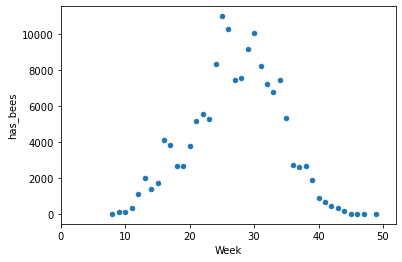

In [46]:
week_sums.plot(kind='scatter', x='Week', y='has_bees', xlim=[0, 52])

Per-caste recordings show distinct seasonal differences.

<AxesSubplot:xlabel='[Week, Week, Week]', ylabel='[has_queens, has_workers, has_males]'>

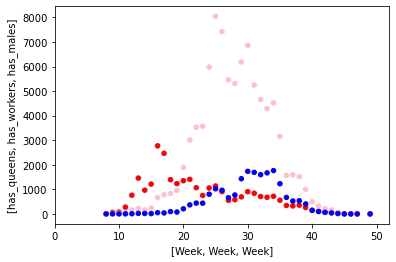

In [47]:
week_sums.plot(kind='scatter', \
               x=['Week', 'Week', 'Week'], \
               y=['has_queens', 'has_workers', 'has_males'], \
               c=['red', 'pink', 'blue'] * week_sums.shape[0], \
               xlim=[0, 52])

## Bumblebee sightings by caste

Let's complete the scatter plot by adding a title, axis and series labels and, of course, attribution info.

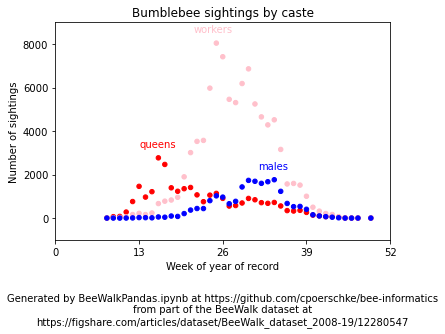

In [48]:
ax = plt.subplot()

columns = ['has_queens', 'has_workers', 'has_males']
colours = ['red', 'pink', 'blue']
            
week_sums.plot(kind='scatter', \
               x=['Week'] * len(columns), \
               y=columns, \
               c=colours * week_sums.shape[0], \
               ax=ax, \
               title='Bumblebee sightings by caste', \
               xlabel=metadata.loc['Week', 'Explanation'], \
               ylabel='Number of sightings', \
               xticks=[0, 13, 26, 39, 52], \
               xlim=[0, 52], \
               ylim=[-1000, 9000])

for idx in range(0,len(columns)):
    # shorten 'has_xyz' to 'xyz'
    series_label = columns[idx][4:]

    # place the series label near the series' data values
    y_values = week_sums[columns[idx]]
    
    # place the series label vertically slightly above the series maximum
    text_y = y_values.max() + 500
    
    # place the series label horizontally near the middle of the maximums
    text_x = week_sums[ y_values == y_values.max() ]['Week'].median() - len(series_label)/2

    # show the label
    ax.text(x=text_x, y=text_y, s=series_label, color=colours[idx])

notebook = "BeeWalkPandas.ipynb"
repo_url = "https://github.com/cpoerschke/bee-informatics"

attribution = f'Generated by {notebook} at {repo_url}\nfrom part of the BeeWalk dataset at\n{dataset_url}'
_ = ax.text(x=26, y=-5000, s=attribution, horizontalalignment='center', verticalalignment='bottom')

## Further reading

So, how come there's the seasonal differences between female (queen) and male bumblebee sightings?

Well, I'll leave that question deliberately unanswered here and instead would like to encourage you to read more about bumblebees e.g. at https://www.bumblebeeconservation.org/about-bumblebees/ and/or on [Wikipedia](https://en.wikipedia.org/wiki/Bumblebee).